In [1]:
import re
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from bs4 import BeautifulSoup 
import warnings
import requests
warnings.filterwarnings("ignore")

In [166]:
url = "https://www.flipkart.com/search?q=camera&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off"

In [167]:
response = requests.get(url)

In [168]:
response

<Response [200]>

In [169]:
response.text[1:100]

'!doctype html><html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><'

In [170]:
response.content[1:100]

b'!doctype html><html lang="en"><head><link href="https://rukminim2.flixcart.com" rel="preconnect"/><'

In [171]:
pagecontent = response.text

In [172]:
soup = BeautifulSoup(pagecontent)

In [173]:
# soup

In [192]:
from bs4 import BeautifulSoup
import requests
import numpy as np
import time

productname = [] 
price = []
rating = []
features = []
pagenum = []
original_price = []
Discount = []
Review = []

total_time = time.time()

for i in range(1, 51): 
    start_time = time.time()
    URL = f"https://www.flipkart.com/search?q=camera&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off{i}"
    page = requests.get(URL)
    soup = BeautifulSoup(page.text, "html.parser")

    for x in soup.find_all('div', attrs={'class':'yKfJKb row'}):
        pname = x.find('div', attrs={'class':'KzDlHZ'})
        cost = x.find('div', attrs={'class':'Nx9bqj _4b5DiR'})   # discounted price
        rat = x.find('div', attrs={'class':'XQDdHH'})
        specs = x.find('div', attrs={'class':'_6NESgJ'})
        op = x.find('div', attrs={'class':'yRaY8j ZYYwLA'})
        discount = x.find('div', attrs={'class':'UkUFwK'})
        reviews = x.find('span', attrs={'class':'Wphh3N'})
        

        productname.append(pname.text if pname else np.nan)
        price.append(cost.text if cost else np.nan)
        rating.append(rat.text if rat else np.nan)
        features.append(specs.text if specs else np.nan)
        original_price.append(op.text if op else np.nan)
        Discount.append(discount.text if discount else np.nan)
        Review.append(reviews.text if reviews else np.nan)
        
        pagenum.append(i)

    print(f'Page {i} completed in {time.time()-start_time:.2f} seconds')

print("Total Time Completed in seconds", str(time.time()-total_time))


Page 1 completed in 0.63 seconds
Page 2 completed in 0.95 seconds
Page 3 completed in 0.63 seconds
Page 4 completed in 0.50 seconds
Page 5 completed in 0.97 seconds
Page 6 completed in 0.54 seconds
Page 7 completed in 0.66 seconds
Page 8 completed in 0.68 seconds
Page 9 completed in 0.62 seconds
Page 10 completed in 0.62 seconds
Page 11 completed in 0.53 seconds
Page 12 completed in 0.58 seconds
Page 13 completed in 0.85 seconds
Page 14 completed in 0.50 seconds
Page 15 completed in 0.51 seconds
Page 16 completed in 0.55 seconds
Page 17 completed in 0.58 seconds
Page 18 completed in 0.51 seconds
Page 19 completed in 1.00 seconds
Page 20 completed in 0.76 seconds
Page 21 completed in 0.84 seconds
Page 22 completed in 0.54 seconds
Page 23 completed in 0.63 seconds
Page 24 completed in 0.69 seconds
Page 25 completed in 0.70 seconds
Page 26 completed in 0.59 seconds
Page 27 completed in 0.60 seconds
Page 28 completed in 0.91 seconds
Page 29 completed in 0.70 seconds
Page 30 completed in 0.

In [193]:
camera_df = pd.DataFrame({"product_name":productname,
                          "price":price,"rating":rating,
                          "features":features,"pagenum":pagenum,
                          "original_price":original_price,
                          "Discount":Discount,"Review":Review})

In [194]:
camera_df

,product_name,price,rating,features,pagenum,original_price,Discount,Review
0,"IZI One+ Action Camera ONE+ 5K Action Camera, ...","₹8,737",3.7,"Effective Pixels: 48 MP5k, 4k1 Year Manufactur...",1,"₹16,999",48% off,70 Ratings & 5 Reviews
1,Cubonic 5K WiFi Dual Screen |Smoothest EIS 2.0...,"₹7,456",4.2,Effective Pixels: 20 MPHDNon-returnable,1,"₹12,999",42% off,21 Ratings & 2 Reviews
2,istylei Gift toys Kids Camera For Kids HD Real...,₹595,3.6,Effective Pixels: 8 MPHDNA,1,₹999,40% off,216 Ratings & 8 Reviews
3,Uphaar by OMG 2025 Kid's Digital Camera & Mini...,₹571,3.8,Effective Pixels: 20 MPHDN/A,1,"₹1,499",61% off,69 Ratings & 0 Reviews
4,Uphaar by OMG 2022 Kid's Digital Camera & Mini...,₹563,3.4,Effective Pixels: 20 MP480pN/A,1,"₹1,999",71% off,240 Ratings & 8 Reviews
...,...,...,...,...,...,...,...,...
1195,Clubmall E88 Pro 4K Camera Drone with WiFi FPV...,"₹1,750",2.9,Type: Professional DroneControl Range: 102 mPo...,50,"₹6,111",71% off,"1,101 Ratings & 37 Reviews"
1196,Prime Assure Mini Camera Photo Instant Photo P...,"₹1,749",4,"Exposure Mode: Manual, AutomaticView Finder: Y...",50,"₹2,999",41% off,23 Ratings & 1 Reviews
1197,SIOVS SECURITY CAMERA Spy Camera Wireless Hidd...,₹709,3.4,Effective Pixels: 12 MP1080p7 Days Replacement...,50,"₹2,999",76% off,22 Ratings & 4 Reviews
1198,SROPX MINI CAMERA WIFI Small Wireless Home Sec...,₹699,3,Effective Pixels: 12 MP1920*1080p7 Days Replac...,50,"₹2,499",72% off,6 Ratings & 1 Reviews


In [195]:
camera_df.to_csv("camera.csv",index=False)

In [196]:
df = pd.read_csv("camera.csv")

In [197]:
df

,product_name,price,rating,features,pagenum,original_price,Discount,Review
0,"IZI One+ Action Camera ONE+ 5K Action Camera, ...","₹8,737",3.7,"Effective Pixels: 48 MP5k, 4k1 Year Manufactur...",1,"₹16,999",48% off,70 Ratings & 5 Reviews
1,Cubonic 5K WiFi Dual Screen |Smoothest EIS 2.0...,"₹7,456",4.2,Effective Pixels: 20 MPHDNon-returnable,1,"₹12,999",42% off,21 Ratings & 2 Reviews
2,istylei Gift toys Kids Camera For Kids HD Real...,₹595,3.6,Effective Pixels: 8 MPHDNA,1,₹999,40% off,216 Ratings & 8 Reviews
3,Uphaar by OMG 2025 Kid's Digital Camera & Mini...,₹571,3.8,Effective Pixels: 20 MPHDN/A,1,"₹1,499",61% off,69 Ratings & 0 Reviews
4,Uphaar by OMG 2022 Kid's Digital Camera & Mini...,₹563,3.4,Effective Pixels: 20 MP480pN/A,1,"₹1,999",71% off,240 Ratings & 8 Reviews
...,...,...,...,...,...,...,...,...
1195,Clubmall E88 Pro 4K Camera Drone with WiFi FPV...,"₹1,750",2.9,Type: Professional DroneControl Range: 102 mPo...,50,"₹6,111",71% off,"1,101 Ratings & 37 Reviews"
1196,Prime Assure Mini Camera Photo Instant Photo P...,"₹1,749",4.0,"Exposure Mode: Manual, AutomaticView Finder: Y...",50,"₹2,999",41% off,23 Ratings & 1 Reviews
1197,SIOVS SECURITY CAMERA Spy Camera Wireless Hidd...,₹709,3.4,Effective Pixels: 12 MP1080p7 Days Replacement...,50,"₹2,999",76% off,22 Ratings & 4 Reviews
1198,SROPX MINI CAMERA WIFI Small Wireless Home Sec...,₹699,3.0,Effective Pixels: 12 MP1920*1080p7 Days Replac...,50,"₹2,499",72% off,6 Ratings & 1 Reviews


In [198]:
df.head(2)

,product_name,price,rating,features,pagenum,original_price,Discount,Review
0,"IZI One+ Action Camera ONE+ 5K Action Camera, ...","₹8,737",3.7,"Effective Pixels: 48 MP5k, 4k1 Year Manufactur...",1,"₹16,999",48% off,70 Ratings & 5 Reviews
1,Cubonic 5K WiFi Dual Screen |Smoothest EIS 2.0...,"₹7,456",4.2,Effective Pixels: 20 MPHDNon-returnable,1,"₹12,999",42% off,21 Ratings & 2 Reviews


In [199]:
df.shape

(1200, 8)

In [200]:
df.dtypes

product_name       object
price              object
rating            float64
features           object
pagenum             int64
original_price     object
Discount           object
Review             object
dtype: object

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_name    1200 non-null   object 
 1   price           1200 non-null   object 
 2   rating          1150 non-null   float64
 3   features        1200 non-null   object 
 4   pagenum         1200 non-null   int64  
 5   original_price  1200 non-null   object 
 6   Discount        1200 non-null   object 
 7   Review          1150 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 75.1+ KB


In [202]:
df["rating"]

0       3.7
1       4.2
2       3.6
3       3.8
4       3.4
       ... 
1195    2.9
1196    4.0
1197    3.4
1198    3.0
1199    3.4
Name: rating, Length: 1200, dtype: float64

In [203]:
df['rating'].value_counts()

rating
3.4    200
3.3    150
3.7    148
2.8    129
3.6    100
3.5    100
3.8     50
2.0     50
2.5     50
3.0     50
2.9     50
4.2     48
4.0     23
1.5      2
Name: count, dtype: int64

In [204]:
df.isnull().sum()

product_name       0
price              0
rating            50
features           0
pagenum            0
original_price     0
Discount           0
Review            50
dtype: int64

In [205]:
df['rating'].fillna(df['rating'].mode()[0],inplace=True)

In [206]:
df['Review'].fillna(df['Review'].mode()[0],inplace=True)

In [207]:
df.isnull().sum()

product_name      0
price             0
rating            0
features          0
pagenum           0
original_price    0
Discount          0
Review            0
dtype: int64

In [208]:
df.duplicated().sum()

0

In [209]:
df['product_name']

0       IZI One+ Action Camera ONE+ 5K Action Camera, ...
1       Cubonic 5K WiFi Dual Screen |Smoothest EIS 2.0...
2       istylei Gift toys Kids Camera For Kids HD Real...
3       Uphaar by OMG 2025 Kid's Digital Camera & Mini...
4       Uphaar by OMG 2022 Kid's Digital Camera & Mini...
                              ...                        
1195    Clubmall E88 Pro 4K Camera Drone with WiFi FPV...
1196    Prime Assure Mini Camera Photo Instant Photo P...
1197    SIOVS SECURITY CAMERA Spy Camera Wireless Hidd...
1198    SROPX MINI CAMERA WIFI Small Wireless Home Sec...
1199    SROPX MINI Mini Camera Mini HD Camera With Voi...
Name: product_name, Length: 1200, dtype: object

In [210]:
df["product_name"][0]

'IZI One+ Action Camera ONE+ 5K Action Camera, 48MP, 6-Axis Gyro, Waterproof, WiFi, Dual Touch Screen S...'

In [211]:
df["Brand"] = df ["product_name"].apply(lambda x: re.findall(r"^\w+",x)[0])

In [212]:
df["Brand"]

0            IZI
1        Cubonic
2        istylei
3         Uphaar
4         Uphaar
          ...   
1195    Clubmall
1196       Prime
1197       SIOVS
1198       SROPX
1199       SROPX
Name: Brand, Length: 1200, dtype: object

In [213]:
df["Brand"].value_counts().head()

Brand
SROPX      152
Uphaar     150
SIOVS      100
AAlly       50
istylei     50
Name: count, dtype: int64

In [214]:
df.head(1)

,product_name,price,rating,features,pagenum,original_price,Discount,Review,Brand
0,"IZI One+ Action Camera ONE+ 5K Action Camera, ...","₹8,737",3.7,"Effective Pixels: 48 MP5k, 4k1 Year Manufactur...",1,"₹16,999",48% off,70 Ratings & 5 Reviews,IZI


In [215]:
df["features"]

0       Effective Pixels: 48 MP5k, 4k1 Year Manufactur...
1                 Effective Pixels: 20 MPHDNon-returnable
2                              Effective Pixels: 8 MPHDNA
3                            Effective Pixels: 20 MPHDN/A
4                          Effective Pixels: 20 MP480pN/A
                              ...                        
1195    Type: Professional DroneControl Range: 102 mPo...
1196    Exposure Mode: Manual, AutomaticView Finder: Y...
1197    Effective Pixels: 12 MP1080p7 Days Replacement...
1198    Effective Pixels: 12 MP1920*1080p7 Days Replac...
1199    Effective Pixels: 12 MP1920*1080p7 Days Replac...
Name: features, Length: 1200, dtype: object

In [216]:
df["processor_name"] = df["features"]

In [217]:
df["features"].apply(lambda x:re.findall(r"^\w+",x)[0])

0       Effective
1       Effective
2       Effective
3       Effective
4       Effective
          ...    
1195         Type
1196     Exposure
1197    Effective
1198    Effective
1199    Effective
Name: features, Length: 1200, dtype: object

In [218]:
df["processor_name"] =df["features"].apply(lambda x:re.findall(r"^\w+",x)[0])

In [219]:
df["processor_name"].value_counts()

processor_name
Effective    1027
Type          150
Exposure       23
Name: count, dtype: int64

In [220]:
df.head()

,product_name,price,rating,features,pagenum,original_price,Discount,Review,Brand,processor_name
0,"IZI One+ Action Camera ONE+ 5K Action Camera, ...","₹8,737",3.7,"Effective Pixels: 48 MP5k, 4k1 Year Manufactur...",1,"₹16,999",48% off,70 Ratings & 5 Reviews,IZI,Effective
1,Cubonic 5K WiFi Dual Screen |Smoothest EIS 2.0...,"₹7,456",4.2,Effective Pixels: 20 MPHDNon-returnable,1,"₹12,999",42% off,21 Ratings & 2 Reviews,Cubonic,Effective
2,istylei Gift toys Kids Camera For Kids HD Real...,₹595,3.6,Effective Pixels: 8 MPHDNA,1,₹999,40% off,216 Ratings & 8 Reviews,istylei,Effective
3,Uphaar by OMG 2025 Kid's Digital Camera & Mini...,₹571,3.8,Effective Pixels: 20 MPHDN/A,1,"₹1,499",61% off,69 Ratings & 0 Reviews,Uphaar,Effective
4,Uphaar by OMG 2022 Kid's Digital Camera & Mini...,₹563,3.4,Effective Pixels: 20 MP480pN/A,1,"₹1,999",71% off,240 Ratings & 8 Reviews,Uphaar,Effective


In [221]:
df

,product_name,price,rating,features,pagenum,original_price,Discount,Review,Brand,processor_name
0,"IZI One+ Action Camera ONE+ 5K Action Camera, ...","₹8,737",3.7,"Effective Pixels: 48 MP5k, 4k1 Year Manufactur...",1,"₹16,999",48% off,70 Ratings & 5 Reviews,IZI,Effective
1,Cubonic 5K WiFi Dual Screen |Smoothest EIS 2.0...,"₹7,456",4.2,Effective Pixels: 20 MPHDNon-returnable,1,"₹12,999",42% off,21 Ratings & 2 Reviews,Cubonic,Effective
2,istylei Gift toys Kids Camera For Kids HD Real...,₹595,3.6,Effective Pixels: 8 MPHDNA,1,₹999,40% off,216 Ratings & 8 Reviews,istylei,Effective
3,Uphaar by OMG 2025 Kid's Digital Camera & Mini...,₹571,3.8,Effective Pixels: 20 MPHDN/A,1,"₹1,499",61% off,69 Ratings & 0 Reviews,Uphaar,Effective
4,Uphaar by OMG 2022 Kid's Digital Camera & Mini...,₹563,3.4,Effective Pixels: 20 MP480pN/A,1,"₹1,999",71% off,240 Ratings & 8 Reviews,Uphaar,Effective
...,...,...,...,...,...,...,...,...,...,...
1195,Clubmall E88 Pro 4K Camera Drone with WiFi FPV...,"₹1,750",2.9,Type: Professional DroneControl Range: 102 mPo...,50,"₹6,111",71% off,"1,101 Ratings & 37 Reviews",Clubmall,Type
1196,Prime Assure Mini Camera Photo Instant Photo P...,"₹1,749",4.0,"Exposure Mode: Manual, AutomaticView Finder: Y...",50,"₹2,999",41% off,23 Ratings & 1 Reviews,Prime,Exposure
1197,SIOVS SECURITY CAMERA Spy Camera Wireless Hidd...,₹709,3.4,Effective Pixels: 12 MP1080p7 Days Replacement...,50,"₹2,999",76% off,22 Ratings & 4 Reviews,SIOVS,Effective
1198,SROPX MINI CAMERA WIFI Small Wireless Home Sec...,₹699,3.0,Effective Pixels: 12 MP1920*1080p7 Days Replac...,50,"₹2,499",72% off,6 Ratings & 1 Reviews,SROPX,Effective


In [222]:
df["price"]

0       ₹8,737
1       ₹7,456
2         ₹595
3         ₹571
4         ₹563
         ...  
1195    ₹1,750
1196    ₹1,749
1197      ₹709
1198      ₹699
1199      ₹701
Name: price, Length: 1200, dtype: object

In [223]:
df["price"].apply(lambda x:x[1:])

0       8,737
1       7,456
2         595
3         571
4         563
        ...  
1195    1,750
1196    1,749
1197      709
1198      699
1199      701
Name: price, Length: 1200, dtype: object

In [224]:
df["price"].apply(lambda x:re.sub(r",","",x))

0       ₹8737
1       ₹7456
2        ₹595
3        ₹571
4        ₹563
        ...  
1195    ₹1750
1196    ₹1749
1197     ₹709
1198     ₹699
1199     ₹701
Name: price, Length: 1200, dtype: object

In [225]:
df.dtypes

product_name       object
price              object
rating            float64
features           object
pagenum             int64
original_price     object
Discount           object
Review             object
Brand              object
processor_name     object
dtype: object

In [226]:
df["Review"].isnull().sum()

0

In [227]:
df.isnull().sum()

product_name      0
price             0
rating            0
features          0
pagenum           0
original_price    0
Discount          0
Review            0
Brand             0
processor_name    0
dtype: int64

In [228]:
df['no_of_reviews']=df['Review'].apply(lambda x:re.findall(r"[\d,]+",x)[1])

In [229]:
df['no_of_reviews']=df['no_of_reviews'].apply(lambda x:re.sub(r",","",x))

In [230]:
df['no_of_reviews']=df['no_of_reviews'].astype("int")

In [231]:
df.dtypes

product_name       object
price              object
rating            float64
features           object
pagenum             int64
original_price     object
Discount           object
Review             object
Brand              object
processor_name     object
no_of_reviews       int32
dtype: object

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_name    1200 non-null   object 
 1   price           1200 non-null   object 
 2   rating          1200 non-null   float64
 3   features        1200 non-null   object 
 4   pagenum         1200 non-null   int64  
 5   original_price  1200 non-null   object 
 6   Discount        1200 non-null   object 
 7   Review          1200 non-null   object 
 8   Brand           1200 non-null   object 
 9   processor_name  1200 non-null   object 
 10  no_of_reviews   1200 non-null   int32  
dtypes: float64(1), int32(1), int64(1), object(8)
memory usage: 98.6+ KB


In [233]:
df.head(1)

,product_name,price,rating,features,pagenum,original_price,Discount,Review,Brand,processor_name,no_of_reviews
0,"IZI One+ Action Camera ONE+ 5K Action Camera, ...","₹8,737",3.7,"Effective Pixels: 48 MP5k, 4k1 Year Manufactur...",1,"₹16,999",48% off,70 Ratings & 5 Reviews,IZI,Effective,5


In [234]:
df["product_name"]

0       IZI One+ Action Camera ONE+ 5K Action Camera, ...
1       Cubonic 5K WiFi Dual Screen |Smoothest EIS 2.0...
2       istylei Gift toys Kids Camera For Kids HD Real...
3       Uphaar by OMG 2025 Kid's Digital Camera & Mini...
4       Uphaar by OMG 2022 Kid's Digital Camera & Mini...
                              ...                        
1195    Clubmall E88 Pro 4K Camera Drone with WiFi FPV...
1196    Prime Assure Mini Camera Photo Instant Photo P...
1197    SIOVS SECURITY CAMERA Spy Camera Wireless Hidd...
1198    SROPX MINI CAMERA WIFI Small Wireless Home Sec...
1199    SROPX MINI Mini Camera Mini HD Camera With Voi...
Name: product_name, Length: 1200, dtype: object

In [235]:
df.dtypes

product_name       object
price              object
rating            float64
features           object
pagenum             int64
original_price     object
Discount           object
Review             object
Brand              object
processor_name     object
no_of_reviews       int32
dtype: object

In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_name    1200 non-null   object 
 1   price           1200 non-null   object 
 2   rating          1200 non-null   float64
 3   features        1200 non-null   object 
 4   pagenum         1200 non-null   int64  
 5   original_price  1200 non-null   object 
 6   Discount        1200 non-null   object 
 7   Review          1200 non-null   object 
 8   Brand           1200 non-null   object 
 9   processor_name  1200 non-null   object 
 10  no_of_reviews   1200 non-null   int32  
dtypes: float64(1), int32(1), int64(1), object(8)
memory usage: 98.6+ KB


In [237]:
df.head(1)

,product_name,price,rating,features,pagenum,original_price,Discount,Review,Brand,processor_name,no_of_reviews
0,"IZI One+ Action Camera ONE+ 5K Action Camera, ...","₹8,737",3.7,"Effective Pixels: 48 MP5k, 4k1 Year Manufactur...",1,"₹16,999",48% off,70 Ratings & 5 Reviews,IZI,Effective,5


In [238]:
df["original_price"]

0       ₹16,999
1       ₹12,999
2          ₹999
3        ₹1,499
4        ₹1,999
         ...   
1195     ₹6,111
1196     ₹2,999
1197     ₹2,999
1198     ₹2,499
1199     ₹2,999
Name: original_price, Length: 1200, dtype: object

In [239]:
df["original_price"].apply(lambda x:x[1:])

0       16,999
1       12,999
2          999
3        1,499
4        1,999
         ...  
1195     6,111
1196     2,999
1197     2,999
1198     2,499
1199     2,999
Name: original_price, Length: 1200, dtype: object

In [240]:
df["original_price"]=df["original_price"].apply(lambda x:x[1:])

In [241]:
df["original_price"]=df["original_price"].apply(lambda x:re.sub(r",","",x))

In [242]:
df["original_price"]=df["original_price"].astype("int")

In [243]:
df.dtypes

product_name       object
price              object
rating            float64
features           object
pagenum             int64
original_price      int32
Discount           object
Review             object
Brand              object
processor_name     object
no_of_reviews       int32
dtype: object

In [244]:
df.head(1)

,product_name,price,rating,features,pagenum,original_price,Discount,Review,Brand,processor_name,no_of_reviews
0,"IZI One+ Action Camera ONE+ 5K Action Camera, ...","₹8,737",3.7,"Effective Pixels: 48 MP5k, 4k1 Year Manufactur...",1,16999,48% off,70 Ratings & 5 Reviews,IZI,Effective,5


In [245]:
df['no_of_reviews']=df['Review'].apply(lambda x:re.findall(r"[\d,]+",x)[1])

In [246]:
df['no_of_reviews']=df['no_of_reviews'].apply(lambda x:re.sub(r",","",x))

In [247]:
df['no_of_reviews']=df['no_of_reviews'].astype("int")

In [248]:
df.dtypes

product_name       object
price              object
rating            float64
features           object
pagenum             int64
original_price      int32
Discount           object
Review             object
Brand              object
processor_name     object
no_of_reviews       int32
dtype: object

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_name    1200 non-null   object 
 1   price           1200 non-null   object 
 2   rating          1200 non-null   float64
 3   features        1200 non-null   object 
 4   pagenum         1200 non-null   int64  
 5   original_price  1200 non-null   int32  
 6   Discount        1200 non-null   object 
 7   Review          1200 non-null   object 
 8   Brand           1200 non-null   object 
 9   processor_name  1200 non-null   object 
 10  no_of_reviews   1200 non-null   int32  
dtypes: float64(1), int32(2), int64(1), object(7)
memory usage: 93.9+ KB


In [250]:
df.head(1)

,product_name,price,rating,features,pagenum,original_price,Discount,Review,Brand,processor_name,no_of_reviews
0,"IZI One+ Action Camera ONE+ 5K Action Camera, ...","₹8,737",3.7,"Effective Pixels: 48 MP5k, 4k1 Year Manufactur...",1,16999,48% off,70 Ratings & 5 Reviews,IZI,Effective,5


In [251]:
df["no_of_rating"]=df["Review"].apply(lambda x: re.findall(r"[\d,]+",x)[0])

In [252]:
df["no_of_rating"]=df["Review"].apply(lambda x:re.sub(r",","",x))

In [253]:
df["no_of_rating"]=df["no_of_reviews"].astype("int")

In [254]:
df.dtypes

product_name       object
price              object
rating            float64
features           object
pagenum             int64
original_price      int32
Discount           object
Review             object
Brand              object
processor_name     object
no_of_reviews       int32
no_of_rating        int32
dtype: object

In [255]:
df.head(1)

,product_name,price,rating,features,pagenum,original_price,Discount,Review,Brand,processor_name,no_of_reviews,no_of_rating
0,"IZI One+ Action Camera ONE+ 5K Action Camera, ...","₹8,737",3.7,"Effective Pixels: 48 MP5k, 4k1 Year Manufactur...",1,16999,48% off,70 Ratings & 5 Reviews,IZI,Effective,5,5


In [256]:
df.to_csv("cleaned_camera_df",index=False)

In [257]:
df=pd.read_csv("cleaned_camera_df")

In [258]:
df.head()

,product_name,price,rating,features,pagenum,original_price,Discount,Review,Brand,processor_name,no_of_reviews,no_of_rating
0,"IZI One+ Action Camera ONE+ 5K Action Camera, ...","₹8,737",3.7,"Effective Pixels: 48 MP5k, 4k1 Year Manufactur...",1,16999,48% off,70 Ratings & 5 Reviews,IZI,Effective,5,5
1,Cubonic 5K WiFi Dual Screen |Smoothest EIS 2.0...,"₹7,456",4.2,Effective Pixels: 20 MPHDNon-returnable,1,12999,42% off,21 Ratings & 2 Reviews,Cubonic,Effective,2,2
2,istylei Gift toys Kids Camera For Kids HD Real...,₹595,3.6,Effective Pixels: 8 MPHDNA,1,999,40% off,216 Ratings & 8 Reviews,istylei,Effective,8,8
3,Uphaar by OMG 2025 Kid's Digital Camera & Mini...,₹571,3.8,Effective Pixels: 20 MPHDN/A,1,1499,61% off,69 Ratings & 0 Reviews,Uphaar,Effective,0,0
4,Uphaar by OMG 2022 Kid's Digital Camera & Mini...,₹563,3.4,Effective Pixels: 20 MP480pN/A,1,1999,71% off,240 Ratings & 8 Reviews,Uphaar,Effective,8,8


In [352]:
# -------------------------------------------------------------
# CAMERA DATA VISUAL ANALYSIS - CLEAN & COLORFUL NOTEBOOK
# -------------------------------------------------------------
# Theme: White Background + Vivid Modern Colors
# -------------------------------------------------------------

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Theme setup
sns.set_theme(style="whitegrid", font_scale=1.1)
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

# Load your dataset (use correct path)
df = pd.read_csv("camera.csv")

# Display info
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nData Types:\n", df.dtypes)

# Detect column types
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

print("\nNumeric Columns:", num_cols)
print("Categorical Columns:", cat_cols)


Shape: (1200, 8)

Columns:
 Index(['product_name', 'price', 'rating', 'features', 'pagenum',
       'original_price', 'Discount', 'Review'],
      dtype='object')

Data Types:
 product_name       object
price              object
rating            float64
features           object
pagenum             int64
original_price     object
Discount           object
Review             object
dtype: object

Numeric Columns: ['rating', 'pagenum']
Categorical Columns: ['product_name', 'price', 'features', 'original_price', 'Discount', 'Review']


### UNIVARIATE ANALYSIS

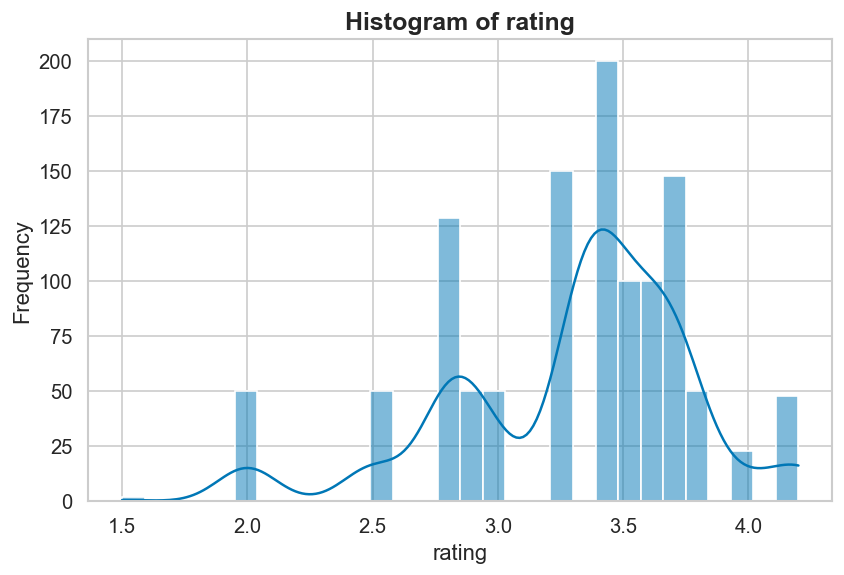

In [353]:
col = num_cols[0]   # Replace with your desired numeric column
plt.figure(figsize=(8, 5))
sns.histplot(df[col], kde=True, bins=30, color="#0077B6")
plt.title(f"Histogram of {col}", fontsize=15, weight='bold')
plt.xlabel(col)
plt.ylabel("Frequency")
plt.show()


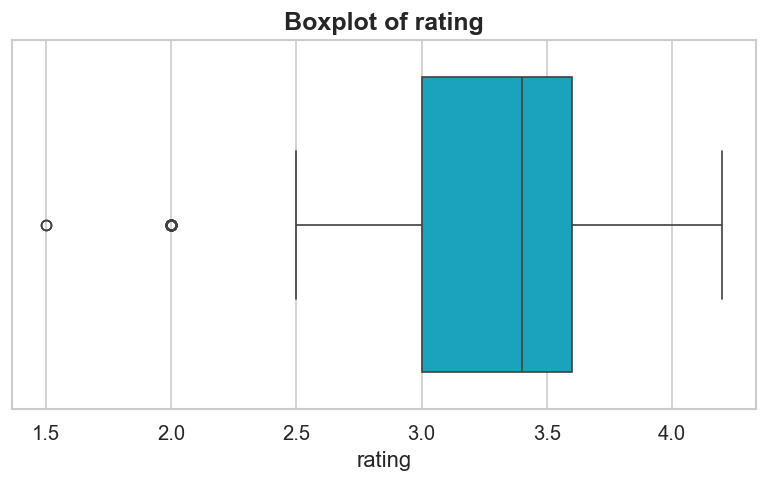

In [354]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=df[num_cols[0]], color="#00B4D8")
plt.title(f"Boxplot of {num_cols[0]}", fontsize=15, weight='bold')
plt.xlabel(num_cols[0])
plt.show()


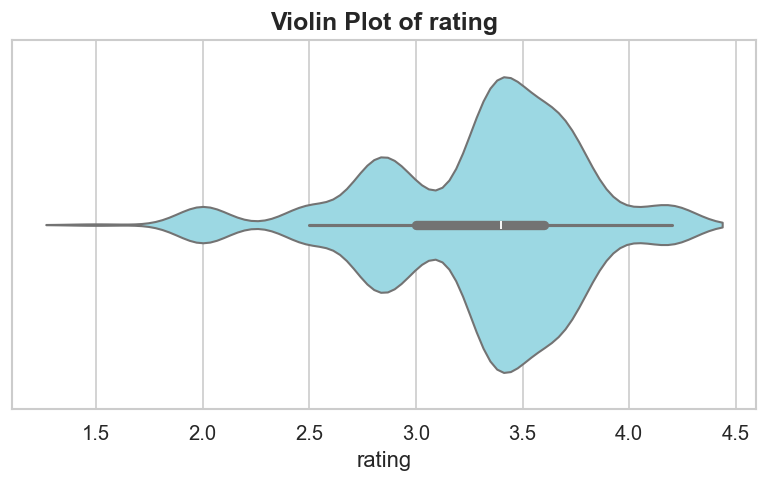

In [355]:
plt.figure(figsize=(8, 4))
sns.violinplot(x=df[num_cols[0]], color="#90E0EF")
plt.title(f"Violin Plot of {num_cols[0]}", fontsize=15, weight='bold')
plt.xlabel(num_cols[0])
plt.show()

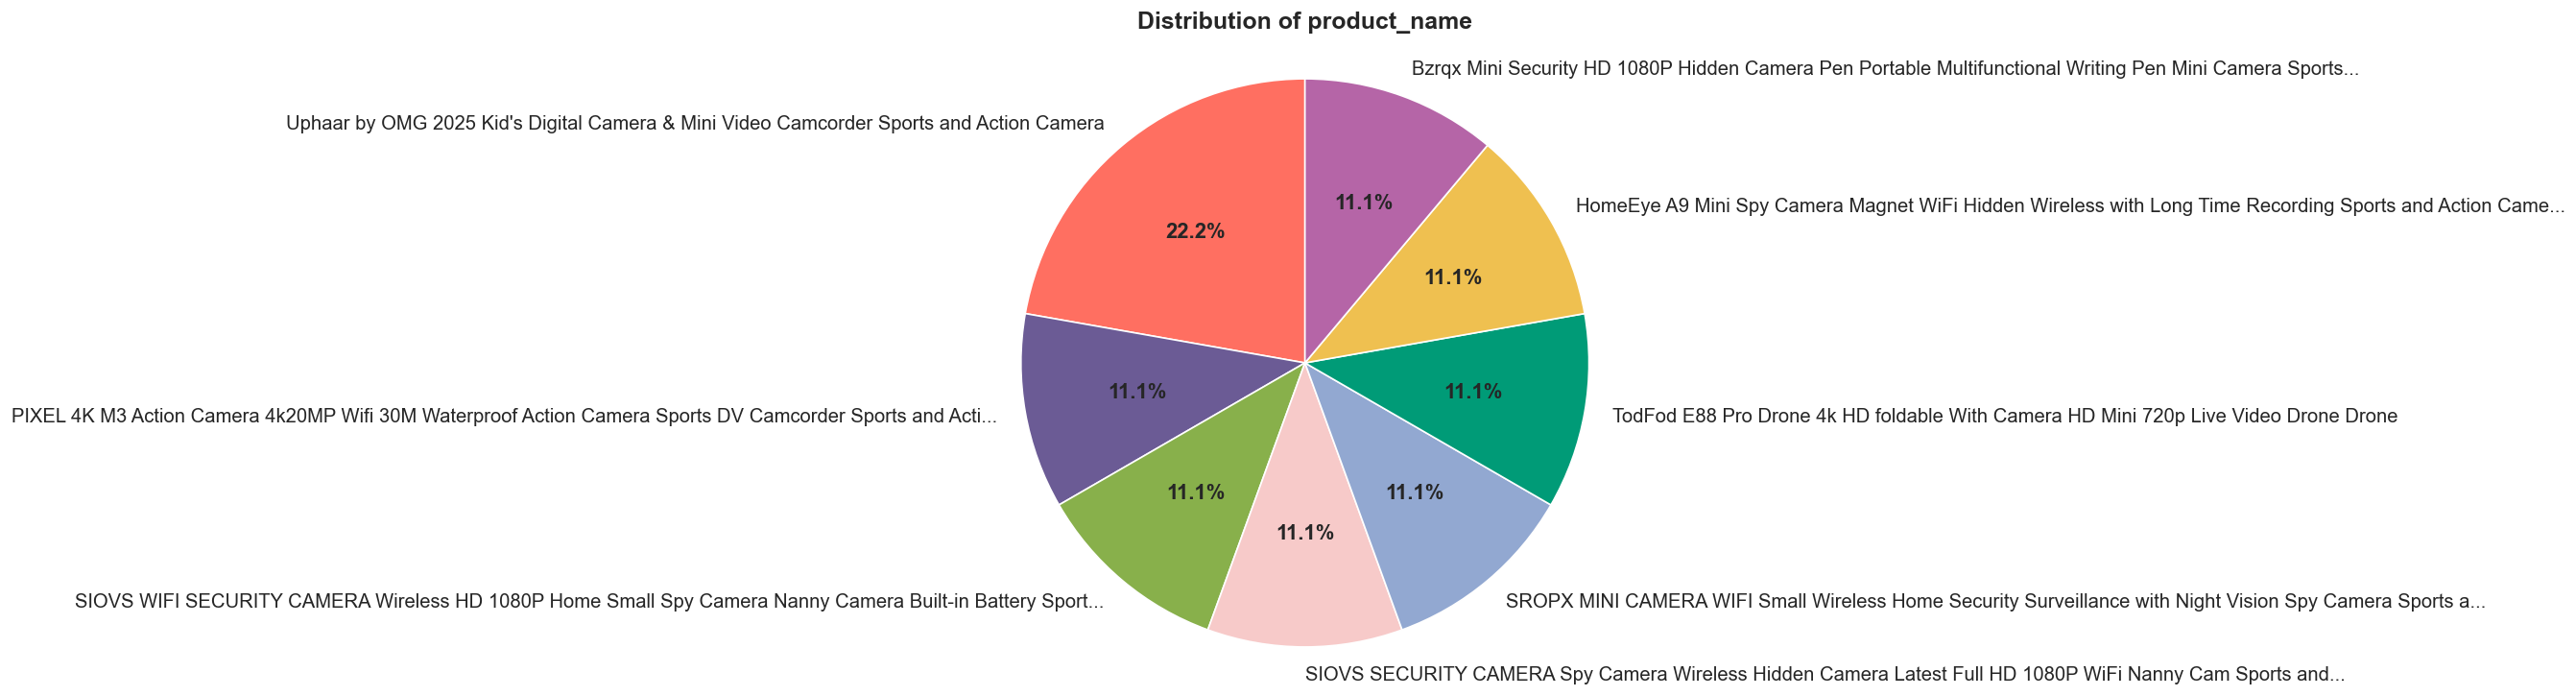

In [356]:
col = cat_cols[0]   # Replace with your categorical column
values = df[col].value_counts().head(8)

colors = sns.color_palette(["#FF6F61", "#6B5B95", "#88B04B", "#F7CAC9", 
                            "#92A8D1", "#009B77", "#EFC050", "#B565A7"])

plt.figure(figsize=(7, 7))
wedges, texts, autotexts = plt.pie(
    values,
    labels=values.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)

for autotext in autotexts:
    autotext.set_fontweight("bold")

plt.title(f"Distribution of {col}", fontsize=15, weight='bold', pad=15)
plt.axis('equal')
plt.tight_layout()
plt.show()


### BIVARIATE ANALYSIS

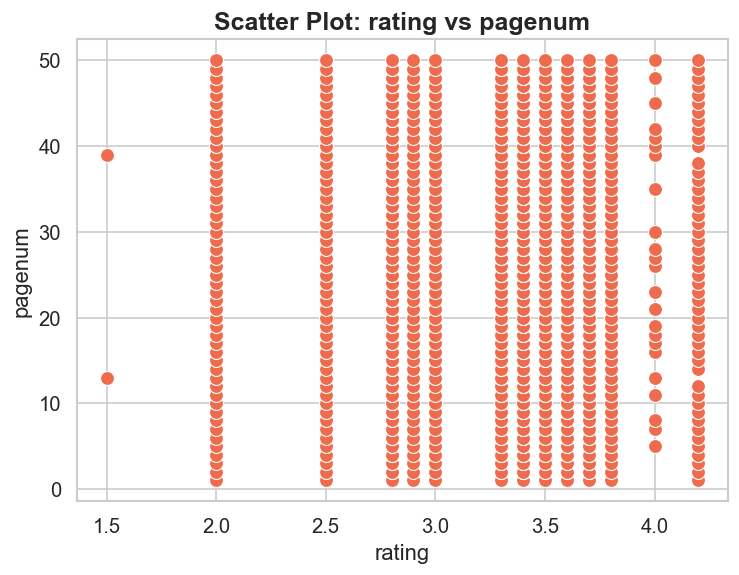

In [357]:
plt.figure(figsize=(7, 5))
sns.scatterplot(x=num_cols[0], y=num_cols[1], data=df, color="#EE6C4D", s=70)
plt.title(f"Scatter Plot: {num_cols[0]} vs {num_cols[1]}", fontsize=15, weight='bold')
plt.xlabel(num_cols[0])
plt.ylabel(num_cols[1])
plt.show()

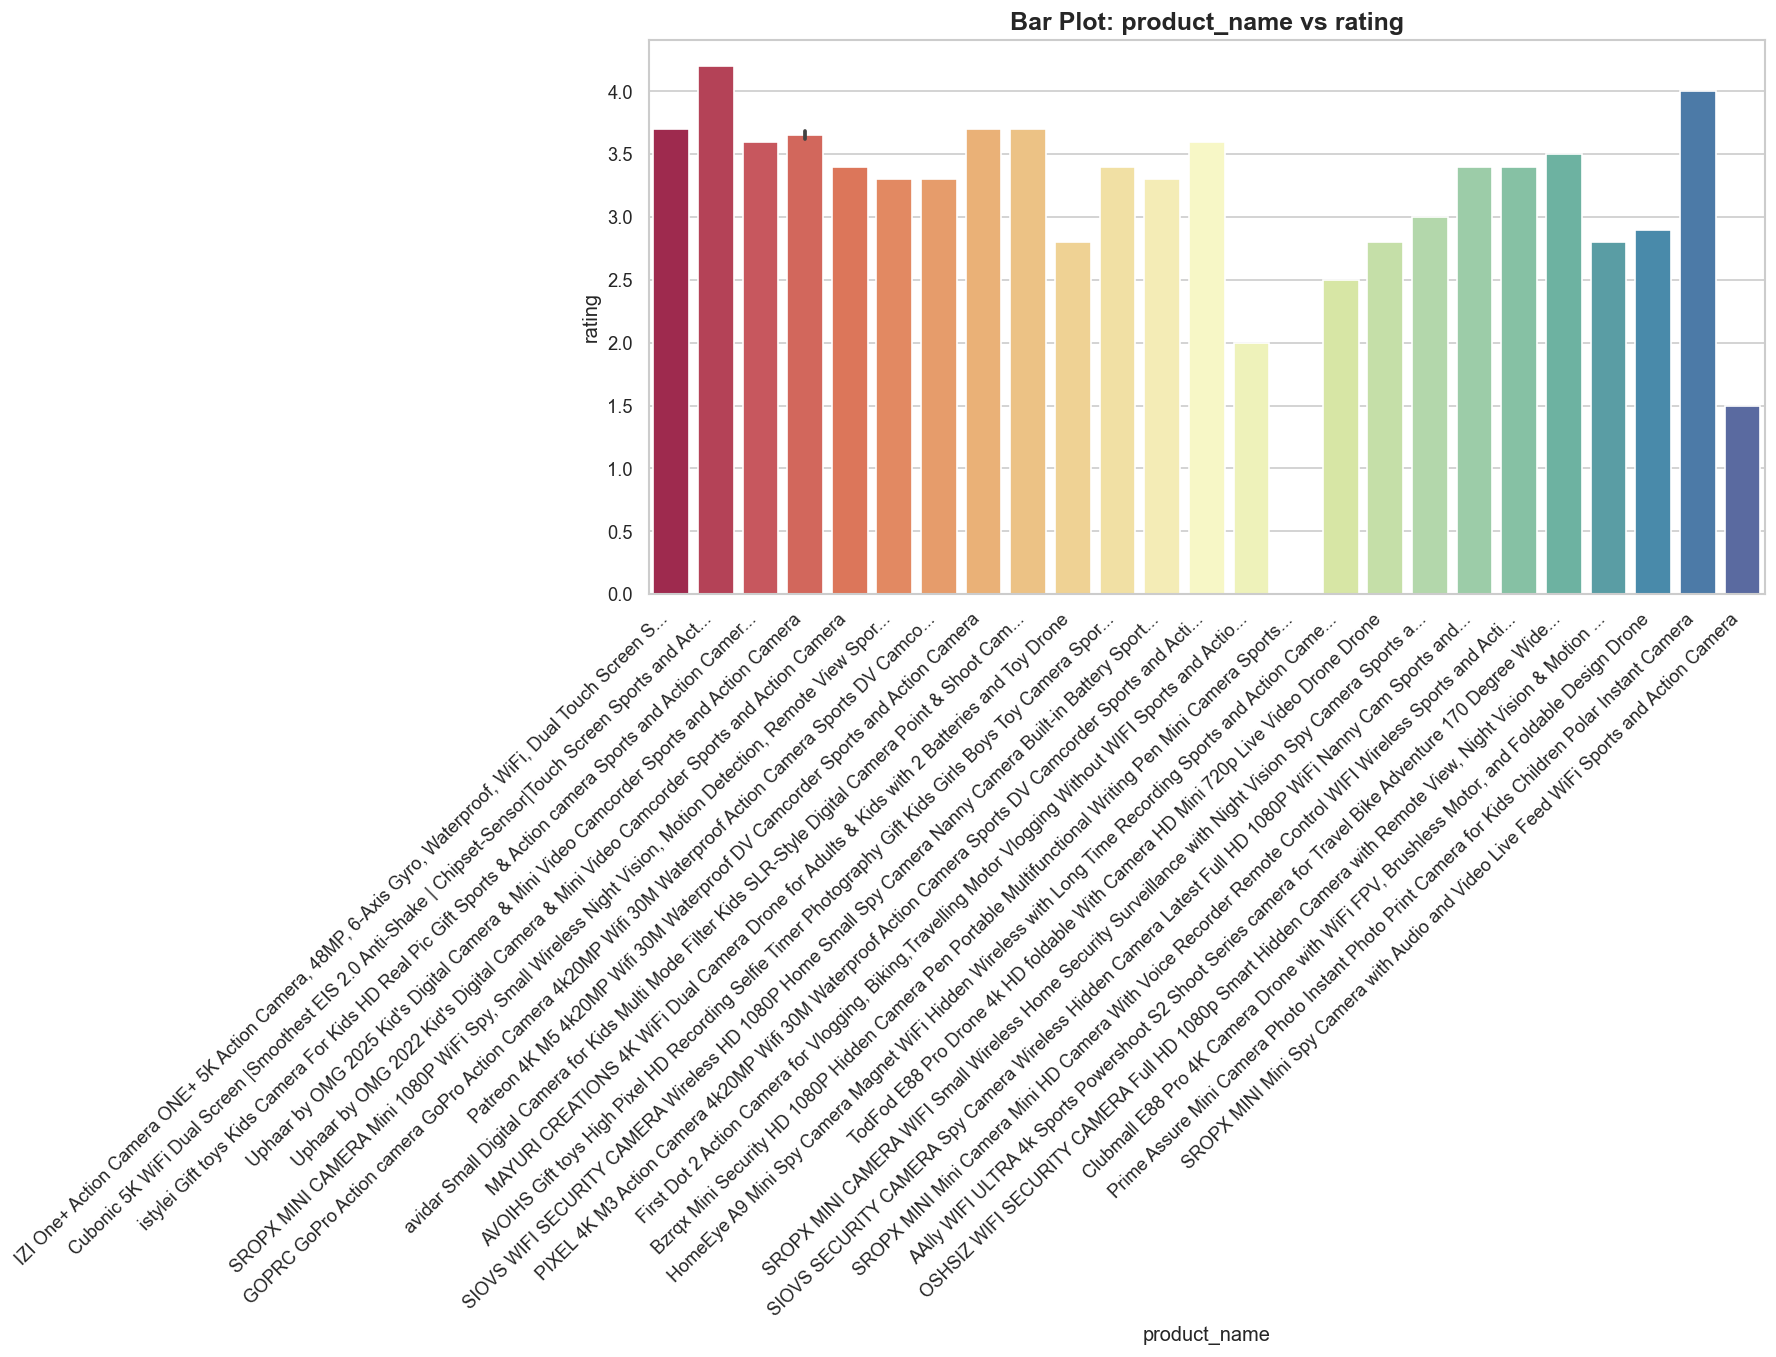

In [378]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")
plt.rcParams['figure.facecolor'] = 'white'

plt.figure(figsize=(12, 6))  # 🔹 wider figure for long names
sns.barplot(
    x=cat_cols[0],
    y=num_cols[0],
    data=df,
    palette="Spectral"
)

plt.title(f"Bar Plot: {cat_cols[0]} vs {num_cols[0]}", fontsize=15, weight='bold')
plt.xlabel(cat_cols[0], fontsize=12)
plt.ylabel(num_cols[0], fontsize=12)

# 🔹 Rotate x-axis labels, align them, and prevent merging
plt.xticks(rotation=45, ha='right')

# 🔹 Add spacing to avoid label cut-off
plt.tight_layout()

plt.show()


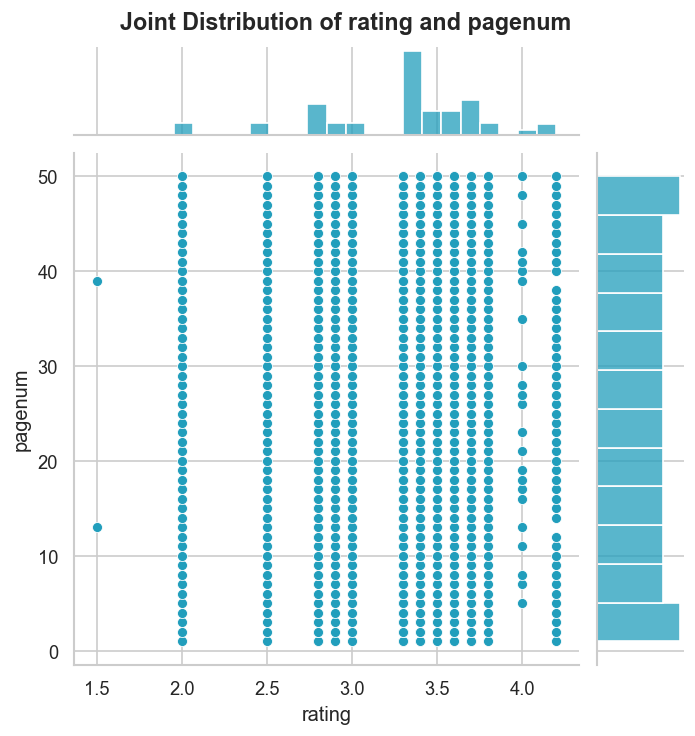

In [363]:
sns.jointplot(x=num_cols[0], y=num_cols[1], data=df, kind="scatter", color="#219EBC", height=6)
plt.suptitle(f"Joint Distribution of {num_cols[0]} and {num_cols[1]}", y=1.02, fontsize=14, weight='bold')
plt.show()

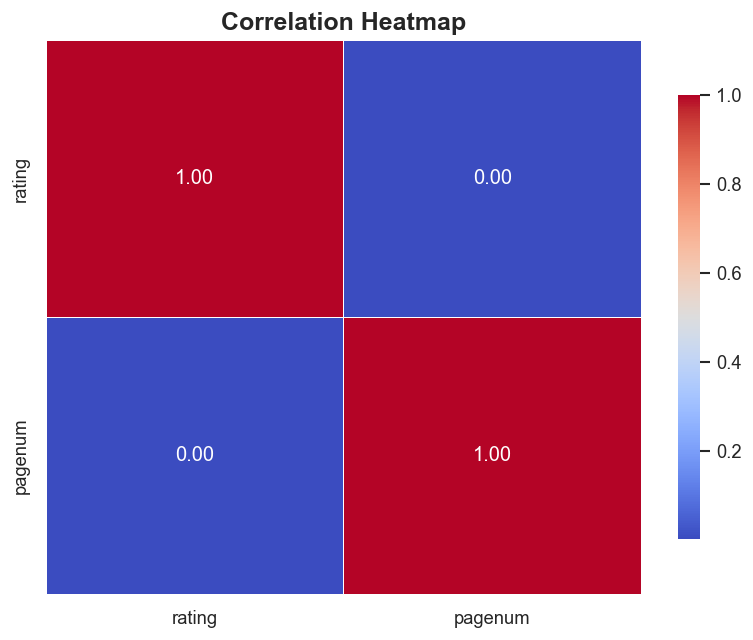

In [364]:
plt.figure(figsize=(8, 6))
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap", fontsize=15, weight='bold')
plt.show()

### MULTIVARIATE ANALYSIS

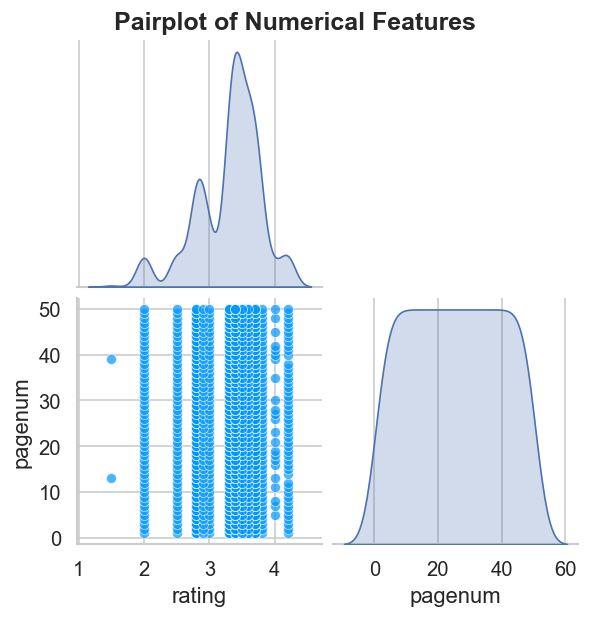

In [389]:
sns.pairplot(df[num_cols], diag_kind='kde', corner=True, plot_kws={'alpha':0.7, 'color':'#0096FF'})
plt.suptitle("Pairplot of Numerical Features", y=1.02, fontsize=15, weight='bold')
plt.show()


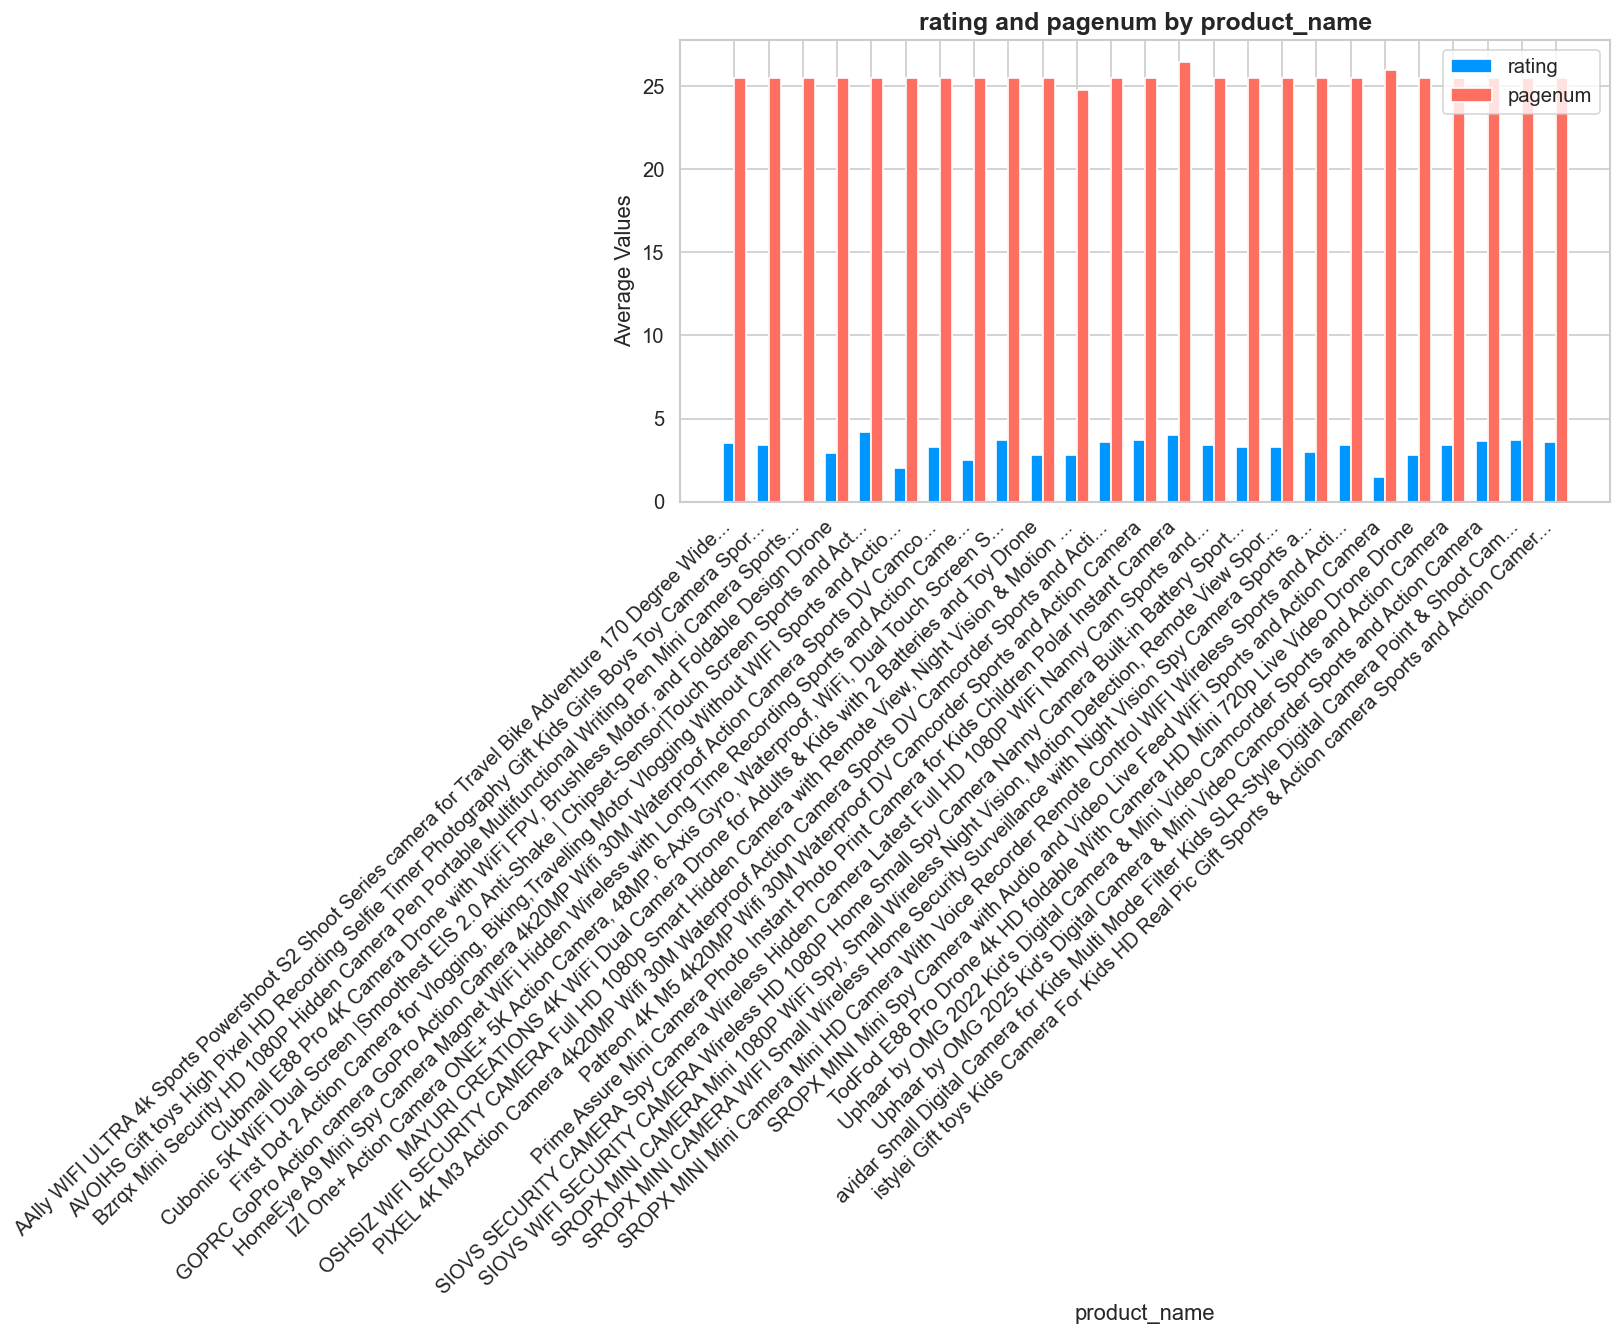

In [390]:
if len(cat_cols) > 0 and len(num_cols) >= 2:
    df[cat_cols[0]] = df[cat_cols[0]].astype(str)
    data = df.groupby(cat_cols[0])[num_cols[:2]].mean().reset_index()
    x = np.arange(len(data[cat_cols[0]]))
    width = 0.35

    plt.figure(figsize=(10,5))
    plt.bar(x - width/2, data[num_cols[0]], width, label=num_cols[0], color='#0096FF')
    plt.bar(x + width/2, data[num_cols[1]], width, label=num_cols[1], color='#FF6F61')

    plt.title(f"{num_cols[0]} and {num_cols[1]} by {cat_cols[0]}", fontsize=15, weight='bold')
    plt.xlabel(cat_cols[0])
    plt.ylabel("Average Values")
    plt.xticks(x, data[cat_cols[0]], rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.show()


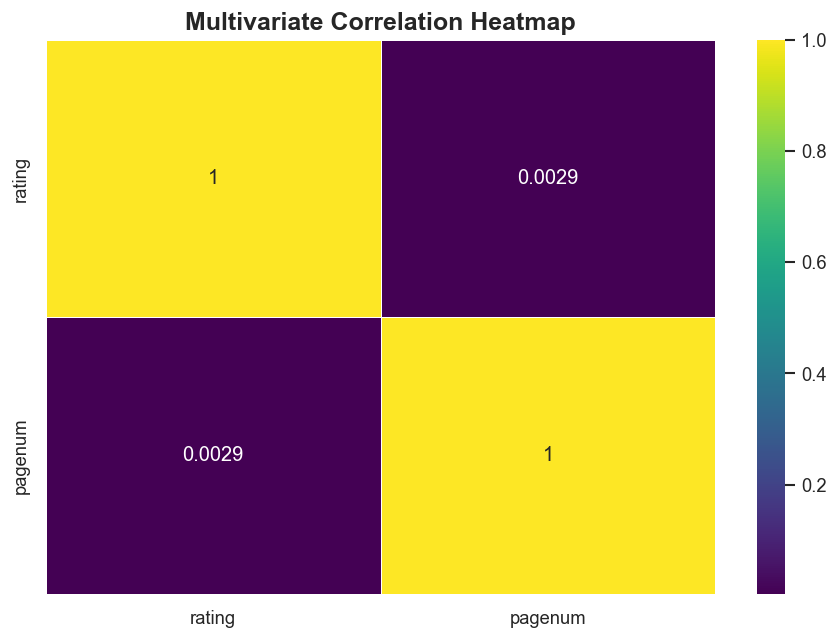

In [382]:
plt.figure(figsize=(9, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="viridis", linewidths=0.5)
plt.title("Multivariate Correlation Heatmap", fontsize=15, weight='bold')
plt.show()